In [2]:
%pip install -U scikit-learn
%pip install matplotlib
%pip install seaborn
%pip install imblearn
%pip install kaggle

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [3]:
# library for prepare the dataset
import os
import zipfile

# library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# library for data processing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# library for modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, StratifiedKFold

# library for model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [4]:

# # set the Kaggle credential

os.environ['KAGGLE_USERNAME'] = 'shantanugaigawali'
os.environ['KAGGLE_KEY'] = 'f87d56fb6fcef2419a1d105ae4512526'

In [5]:
# Download the dataset with Kaggle CLI
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

stroke-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.shape

(5110, 12)

In [9]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<AxesSubplot:>

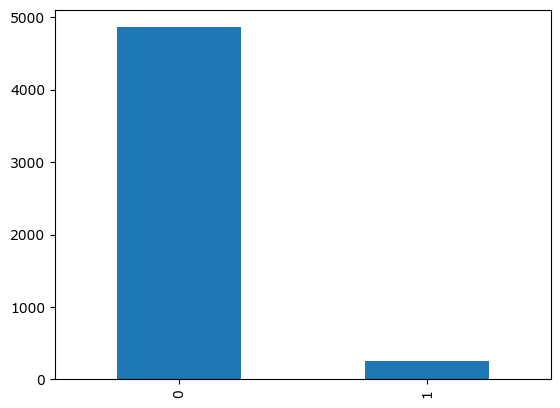

In [11]:
df['stroke'].value_counts().plot(kind='bar')

In [12]:
cats = list(df.select_dtypes(include=['object','bool']) )
nums = list(df.select_dtypes(include=['int64','float64']))
print(cats)
print(nums)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [13]:
encoder = []
onehot = []

for col in cats:
   if len(df[col].unique()) == 2:
        encoder.append(col)
   else:
        onehot.append(col)

print(encoder)
print(onehot)

['ever_married', 'Residence_type']
['gender', 'work_type', 'smoking_status']


In [14]:
df_labencoded = df.copy()

for col in encoder:
    df_labencoded[col] = df_labencoded[col].astype('category').cat.codes
df_labencoded.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


In [15]:
df_labencoded.corr().round(2)

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
id,1.00,0.00,0.00,-0.00,0.01,-0.00,0.00,0.00,0.01
age,0.00,1.00,0.28,0.26,0.68,0.01,0.24,0.33,0.25
hypertension,0.00,0.28,1.00,0.11,0.16,-0.01,0.17,0.17,0.13
heart_disease,-0.00,0.26,0.11,1.00,0.11,0.00,0.16,0.04,0.13
ever_married,0.01,0.68,0.16,0.11,1.00,0.01,0.16,0.34,0.11
Residence_type,-0.00,0.01,-0.01,0.00,0.01,1.00,-0.00,-0.00,0.02
avg_glucose_level,0.00,0.24,0.17,0.16,0.16,-0.00,1.00,0.18,0.13
bmi,0.00,0.33,0.17,0.04,0.34,-0.00,0.18,1.00,0.04
stroke,0.01,0.25,0.13,0.13,0.11,0.02,0.13,0.04,1.00


AxesSubplot(0.125,0.11;0.62x0.77)
AxesSubplot(0.125,0.11;0.62x0.77)
AxesSubplot(0.125,0.11;0.62x0.77)


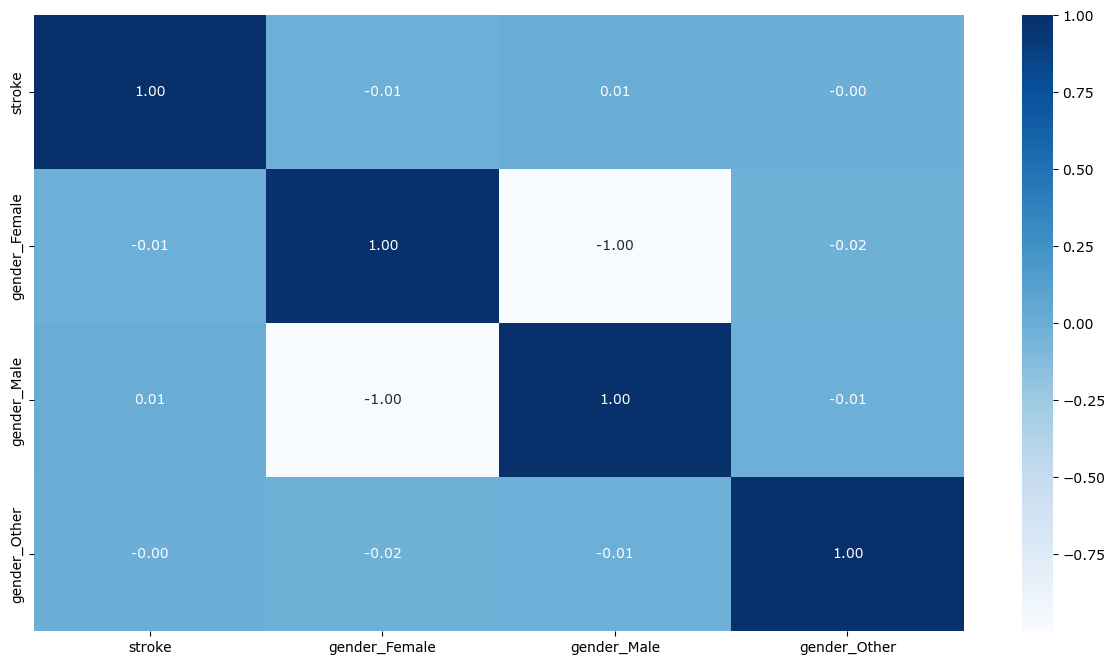

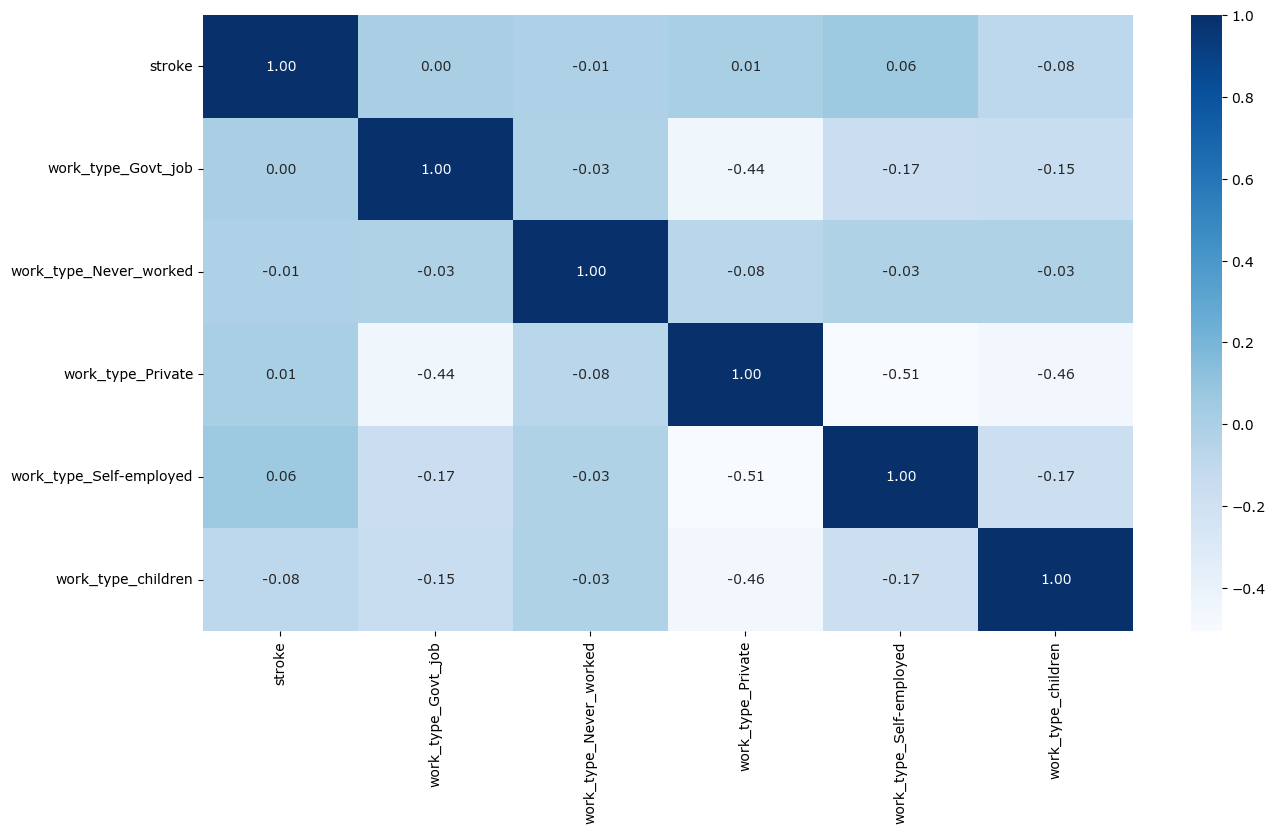

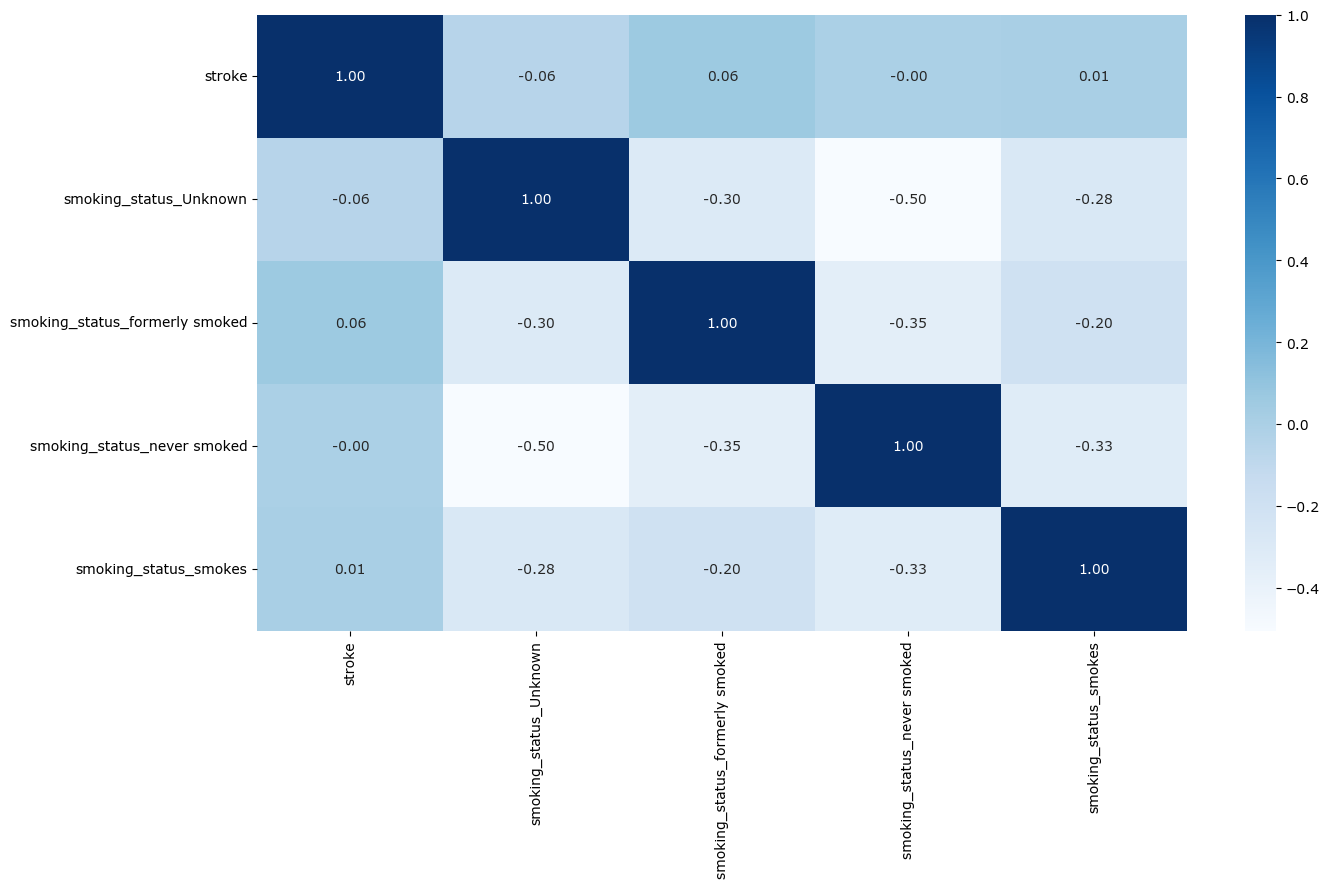

In [16]:
for col in onehot:
    df_loop = df_labencoded[[col,'stroke']].copy()
    onehots = pd.get_dummies(df_loop[col], prefix=col)
    df_loop = df_loop.join(onehots)
    plt.figure(figsize=(15, 8))
    print(sns.heatmap(df_loop.corr(), cmap='Blues', annot=True, fmt='.2f'))

In [17]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [18]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [19]:
duplicate = df.duplicated()
df[duplicate].sum()

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [20]:
df = df.drop(['id'], axis=1)
nums.remove('id')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


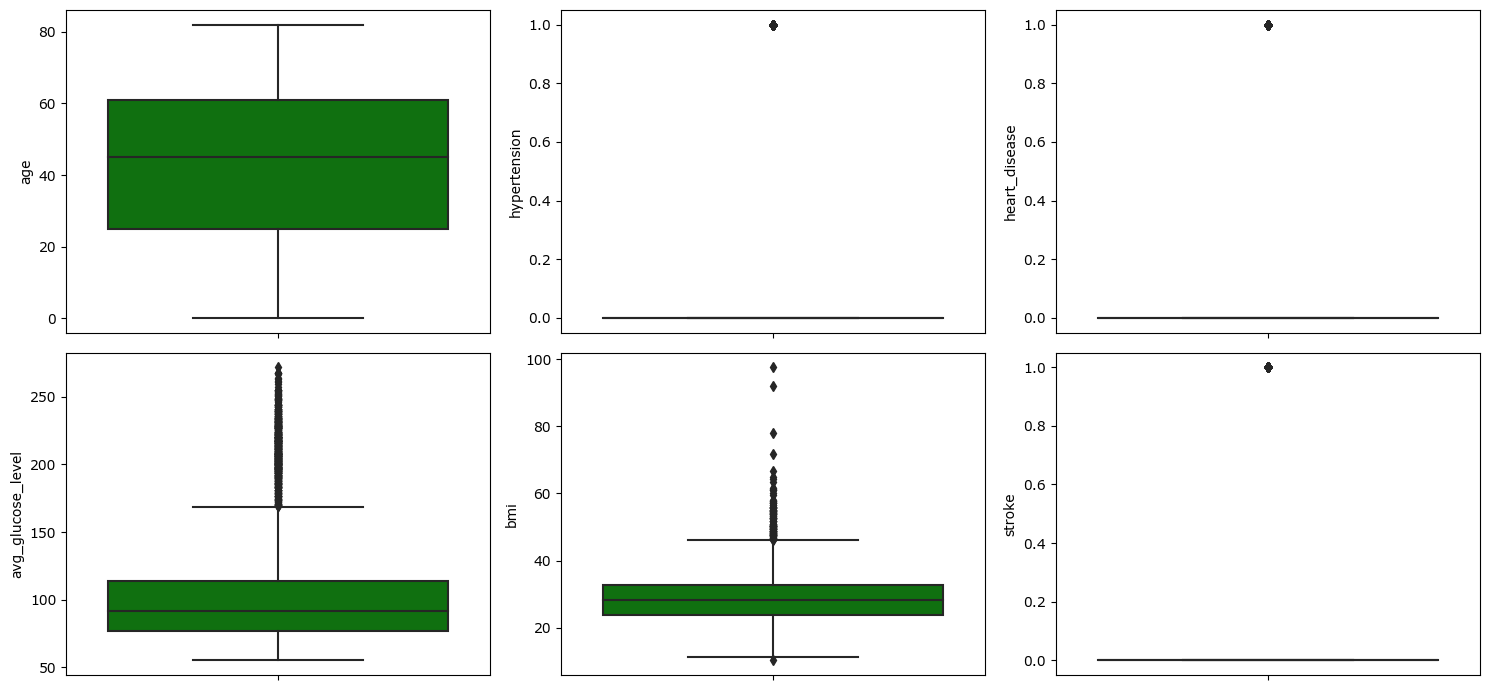

In [21]:
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[nums[i]],color='green',orient='v')
    plt.tight_layout()
     

In [22]:
outlier = ['avg_glucose_level', 'bmi']

In [23]:
Q1 = df[outlier].quantile(0.25)
Q3 = df[outlier].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[outlier]<(Q1-1.5*IQR))|(df[outlier]>(Q3+1.5*IQR))).any(axis=1)]
df.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
2,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
3,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
4,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
4386,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
4387,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
4388,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
4389,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [24]:
df = pd.get_dummies(df)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
6,74.0,1,1,70.09,27.400000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
7,69.0,0,0,94.39,22.800000,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
8,59.0,0,0,76.15,28.893237,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
9,78.0,0,0,58.57,24.200000,1,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [45]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4391 entries, 2 to 5109
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4391 non-null   float64
 1   hypertension                    4391 non-null   int64  
 2   heart_disease                   4391 non-null   int64  
 3   avg_glucose_level               4391 non-null   float64
 4   bmi                             4391 non-null   float64
 5   stroke                          4391 non-null   int64  
 6   gender_Female                   4391 non-null   uint8  
 7   gender_Male                     4391 non-null   uint8  
 8   gender_Other                    4391 non-null   uint8  
 9   ever_married_No                 4391 non-null   uint8  
 10  ever_married_Yes                4391 non-null   uint8  
 11  work_type_Govt_job              4391 non-null   uint8  
 12  work_type_Never_worked          43

: 

In [26]:
X = df.drop(columns = ['stroke'])
y = df['stroke']

In [27]:
sm = SMOTE(random_state=111)
X_sm , y_sm = sm.fit_resample(X,y)

print(f'''Shape of X before SMOTE:{X.shape}
Shape of X after SMOTE:{X_sm.shape}''',"\n\n")

print(f'''Target Class distributuion before SMOTE:\n{y.value_counts(normalize=True)}
Target Class distributuion after SMOTE :\n{y_sm.value_counts(normalize=True)}''')

Shape of X before SMOTE:(4391, 21)
Shape of X after SMOTE:(8452, 21) 


Target Class distributuion before SMOTE:
0    0.962423
1    0.037577
Name: stroke, dtype: float64
Target Class distributuion after SMOTE :
1    0.5
0    0.5
Name: stroke, dtype: float64


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm,
    y_sm,
    test_size = .2,
    random_state = 111)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6761, 21), (6761,), (1691, 21), (1691,))

In [29]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [30]:
baseline_model = KNeighborsClassifier()
baseline_model.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
y_pred = baseline_model.predict(X_test)

In [32]:
acc = accuracy_score(y_test, y_pred)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,baseline_model.predict(X_train)))

baseline_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(baseline_report).transpose()

Testing-set Accuracy score is: 0.9751626256652868
Training-set Accuracy score is: 0.9782576541931667


,precision,recall,f1-score,support
No Stroke,0.969586,0.979115,0.974328,814.000000
Stroke,0.980437,0.971494,0.975945,877.000000
accuracy,0.975163,0.975163,0.975163,0.975163
macro avg,0.975012,0.975305,0.975136,1691.000000
weighted avg,0.975214,0.975163,0.975166,1691.000000


<AxesSubplot:>

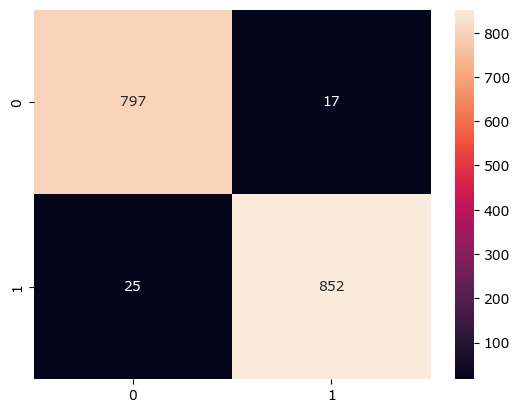

In [33]:
baseline_cf = confusion_matrix(y_test, y_pred)
sns.heatmap(baseline_cf, annot = True, fmt = "d")

In [34]:
param_grid = {'n_neighbors': [1, 2],
              'p': [1, 2],
              'weights': ["uniform","distance"],
              'algorithm':["ball_tree", "kd_tree", "brute"],
              }

In [35]:
new_param = HalvingGridSearchCV(baseline_model, 
                                param_grid, 
                                cv=StratifiedKFold(n_splits=3, random_state= 123, shuffle=True),
                                resource='leaf_size',
                                max_resources=20,
                                scoring='recall',
                                aggressive_elimination=False).fit(X_train, y_train)

In [36]:
print(f"Best Hyperparameter {new_param.best_estimator_} with score {new_param.best_score_}")

Best Hyperparameter KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=1, p=1,
                     weights='distance') with score 0.9668555045356385


In [37]:
model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=1, p=1, weights='distance')
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=1, p=1,
                     weights='distance')

In [38]:
y_pred = model.predict(X_test)

In [39]:
acc = accuracy_score(y_test, y_pred)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,model.predict(X_train)))

improvement_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(improvement_report).transpose()

Testing-set Accuracy score is: 0.9686575990538143
Training-set Accuracy score is: 1.0


,precision,recall,f1-score,support
No Stroke,0.975031,0.959459,0.967183,814.000000
Stroke,0.962921,0.977195,0.970006,877.000000
accuracy,0.968658,0.968658,0.968658,0.968658
macro avg,0.968976,0.968327,0.968594,1691.000000
weighted avg,0.968751,0.968658,0.968647,1691.000000


In [40]:
metrics = pd.DataFrame({'accuracy' : [baseline_report['accuracy'], improvement_report['accuracy']],
                        'f1-score_0' : [baseline_report['No Stroke']['f1-score'],improvement_report['No Stroke']['f1-score']],
                        'precision_0' : [baseline_report['No Stroke']['precision'],improvement_report['No Stroke']['precision']],
                        'recall_0' : [baseline_report['No Stroke']['recall'],improvement_report['No Stroke']['recall']],
                        'f1-score_1' : [baseline_report['Stroke']['f1-score'],improvement_report['Stroke']['f1-score']],
                        'precision_1' : [baseline_report['Stroke']['precision'],improvement_report['Stroke']['precision']],
                        'recall_1' : [baseline_report['Stroke']['recall'],improvement_report['Stroke']['recall']]},
                        index=['Model Baseline','Tuned Model'])
multiheader = [('','accuracy'),
               ('No Stroke', 'f1-score'),
               ('No Stroke', 'precision'),
               ('No Stroke', 'recall'),
               ('Stroke', 'f1-score'),
               ('Stroke', 'precision'),
               ('Stroke', 'recall')]
metrics.columns = pd.MultiIndex.from_tuples(multiheader)
metrics
     

No Stroke                        Stroke            \
                accuracy  f1-score precision    recall  f1-score precision   
Model Baseline  0.975163  0.974328  0.969586  0.979115  0.975945  0.980437   
Tuned Model     0.968658  0.967183  0.975031  0.959459  0.970006  0.962921   

                          
                  recall  
Model Baseline  0.971494  
Tuned Model     0.977195

In [41]:
import pickle

file = open('K_Neighbours_Classifier_model.pkl','wb')

pickle.dump(model, file)

In [42]:
import os
import joblib
model_path = os.path.join('C:\\Users\\LEGION\\brainStrokePrediction\\','knn.sav')

joblib.dump(model,model_path)  
print("Saved knn_model")

Saved knn_model


In [43]:
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
scaler_path = os.path.join('C:\\Users\\LEGION\\brainStrokePrediction\\','scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(sc,scaler_file)

print("Saved scaler object")

Saved scaler object
